In [1]:
from crawler_server import *
import matplotlib.pyplot as plt

In [2]:
TARGET_NAME = "KRW-BTC"
UPBIT_PERIOD = 5
UPBIT_COUNT = 400 # fetch 400 candles per request
DATA_PATH = "./data/" # where to save
DATA_LENGTH = 2400 # total length

In [3]:
to = dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
df = pd.DataFrame()
while (len(df.index) < DATA_LENGTH):
    data = get_candle_data("{0}".format(TARGET_NAME), UPBIT_PERIOD, to, UPBIT_COUNT)
    df = df.append(data, ignore_index=True)
    df.drop_duplicates(subset=['candle_date_time_utc'], keep='first', inplace=True)
    next_to = upbit_get_next_to(df.tail(1))
    k = -1
    while (next_to is None):
        next_to = upbit_get_next_to(df.iloc[k - 1:k])
        k -= 10
    to = next_to
    print("{0} : {1}".format(TARGET_NAME, len(df.index)))
result = df.reindex(index=df.index[::-1])
file_suffix = str(UPBIT_PERIOD) + "_" + str(len(df.index)) + ".csv"
result = rename_col(result)
result.to_csv(DATA_PATH + TARGET_NAME + "_" + file_suffix, index=False)

KRW-BTC : 200
KRW-BTC : 400
KRW-BTC : 600
KRW-BTC : 800
KRW-BTC : 1000
KRW-BTC : 1200
KRW-BTC : 1400
KRW-BTC : 1600
KRW-BTC : 1800
KRW-BTC : 2000
KRW-BTC : 2200
KRW-BTC : 2400


In [4]:
result[-10:]

,datetime,open,high,low,close,volume
9,2018-08-22T09:15:00,7607000.0,7619000.0,7607000.0,7616000.0,19.683772
8,2018-08-22T09:20:00,7619000.0,7622000.0,7611000.0,7611000.0,10.243476
7,2018-08-22T09:25:00,7609000.0,7611000.0,7590000.0,7594000.0,25.334803
6,2018-08-22T09:30:00,7594000.0,7598000.0,7590000.0,7595000.0,6.889311
5,2018-08-22T09:35:00,7590000.0,7611000.0,7590000.0,7602000.0,13.604119
4,2018-08-22T09:40:00,7602000.0,7607000.0,7595000.0,7604000.0,7.221980
3,2018-08-22T09:45:00,7604000.0,7607000.0,7600000.0,7602000.0,7.744314
2,2018-08-22T09:50:00,7602000.0,7602000.0,7590000.0,7596000.0,11.552208
1,2018-08-22T09:55:00,7597000.0,7597000.0,7577000.0,7586000.0,21.164023
0,2018-08-22T10:00:00,7585000.0,7590000.0,7576000.0,7590000.0,7.288116


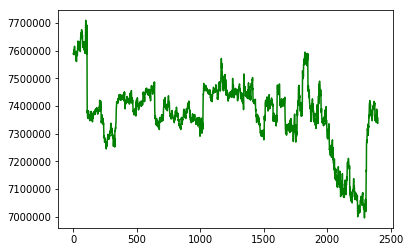

In [9]:
result['close'].plot(color='g')
plt.show()

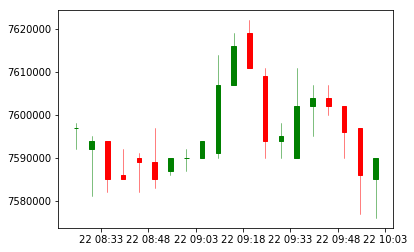

In [6]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

# plot ohlc candle
df_ohlc = result[['datetime', 'open', 'high', 'low', 'close', 'volume']]

## convert date format so that matplotlib understands
df_ohlc['datetime'] = pd.to_datetime(df_ohlc['datetime'])
df_ohlc['datetime'] = df_ohlc['datetime'].map(mdates.date2num)



# make figure, plot
fig = plt.figure()
ax1 = plt.subplot2grid((4, 2), (0, 0), rowspan=5, colspan=2)  # Map subplots for graph
ax1.xaxis_date()  # Treat x-axis as dates

show_limit = 20 # plot latest 20 candles
candlestick_ohlc(ax1, df_ohlc.values[-show_limit:], width=0.001, colorup='g')
plt.show()